In [1]:
import psycopg2
import configparser
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}

In [2]:
def create_connection():
    conn = psycopg2.connect("host=127.0.0.1 dbname=dmqldb user=postgres password=student")
    cur = conn.cursor()       
    return conn, cur

conn, cur = create_connection()

## Individual stock performance

In [3]:
cur.execute("select close, date, symbol from stock_history where date> to_date('01012019', 'mmddyyyy')")
result = cur.fetchall()
df = pd.DataFrame(result, columns = ['Open', 'Date', 'Symbol'])

C:\Users\kaust\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Stock Price')

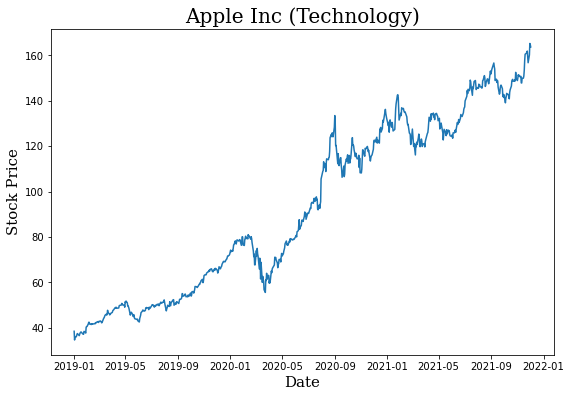

In [4]:
fig1 = plt.figure()
plt.plot(df.loc[df['Symbol'] == 'AAPL']['Date'], df.loc[df['Symbol'] == 'AAPL']['Open'])
plt.gcf().set_size_inches(1.5 * plt.gcf().get_size_inches())

plt.title("Apple Inc (Technology)" , fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Stock Price", fontdict = font2)

Text(0, 0.5, 'Stock Price')

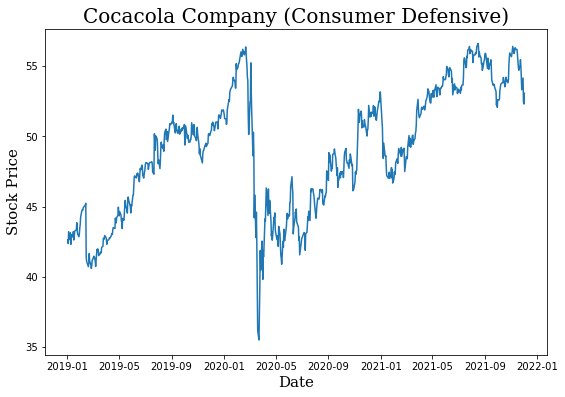

In [5]:
fig2 = plt.figure()
plt.plot(df.loc[df['Symbol'] == 'KO']['Date'], df.loc[df['Symbol'] == 'KO']['Open'])
plt.gcf().set_size_inches(1.5 * plt.gcf().get_size_inches())

plt.title("Cocacola Company (Consumer Defensive)" , fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Stock Price", fontdict = font2)

Text(0, 0.5, 'Stock Price')

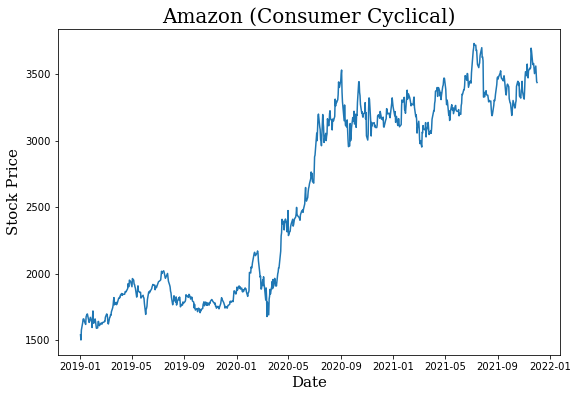

In [6]:
fig3 = plt.figure()
plt.plot(df.loc[df['Symbol'] == 'AMZN']['Date'], df.loc[df['Symbol'] == 'AMZN']['Open'])
plt.gcf().set_size_inches(1.5 * plt.gcf().get_size_inches())

plt.title("Amazon (Consumer Cyclical)", fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Stock Price", fontdict = font2)

Text(0, 0.5, 'Stock Price')

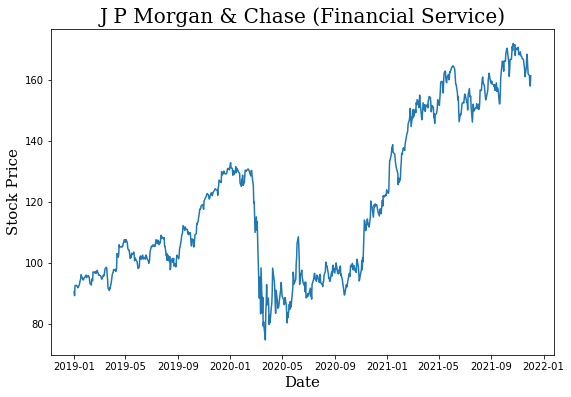

In [7]:
fig4 = plt.figure()
plt.plot(df.loc[df['Symbol'] == 'JPM']['Date'], df.loc[df['Symbol'] == 'JPM']['Open'])
plt.gcf().set_size_inches(1.5 * plt.gcf().get_size_inches())

plt.title("J P Morgan & Chase (Financial Service)" , fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Stock Price", fontdict = font2)

Text(0, 0.5, 'Stock Price')

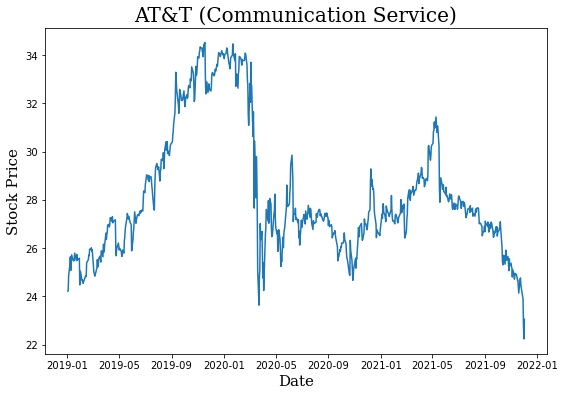

In [8]:
fig5 = plt.figure()
plt.plot(df.loc[df['Symbol'] == 'T']['Date'], df.loc[df['Symbol'] == 'T']['Open'])
plt.gcf().set_size_inches(1.5 * plt.gcf().get_size_inches())

plt.title("AT&T (Communication Service)" , fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Stock Price", fontdict = font2)

## Percent change of stock price for each company

Text(0, 0.5, 'Percentage Change(%)')

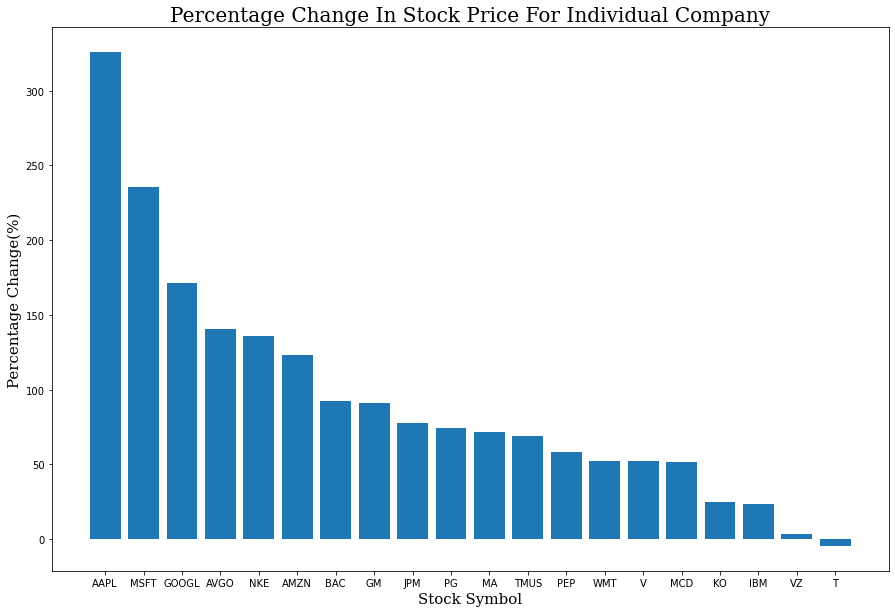

In [9]:
cur.execute( """
            with a as (
                select ROW_NUMBER() OVER (order by symbol) as row_, symbol, date, close 
                    from stock_history),

                b as (
                select symbol, min(row_) as min_row, max(row_) as max_row 
                    from a
                    where date> to_date('01012019', 'mmddyyyy')
                    group by symbol),

                c as (
                select a.symbol, a.close as oldest_close 
                    from a, b 
                    where a.symbol = b.symbol and a.row_ = b.min_row),

                d as (
                select a.symbol, a.close as latest_close 
                    from a, b 
                    where a.symbol = b.symbol and a.row_ = b.max_row)

            select *, ((latest_close-oldest_close)/oldest_close)*100 as pcpt_change 
                from c natural join d natural join company
                order by pcpt_change desc
        """)

result_pcpt = cur.fetchall()
df_pcpt = pd.DataFrame(result_pcpt, columns = ['Symbol', 'Oldest_Close', 'Latest_Close','Name', 'Sector', 'Pcpt_Change'])

fig5 = plt.figure()
plt.bar(df_pcpt['Symbol'], df_pcpt['Pcpt_Change'])
plt.gcf().set_size_inches(2.5 * plt.gcf().get_size_inches())

plt.title("Percentage Change In Stock Price For Individual Company" , fontdict = font1)
plt.xlabel("Stock Symbol", fontdict = font2)
plt.ylabel("Percentage Change(%)", fontdict = font2)

#df_pcpt

## Percent change of stock price for each sector

Text(0, 0.5, 'Percentage Change(%)')

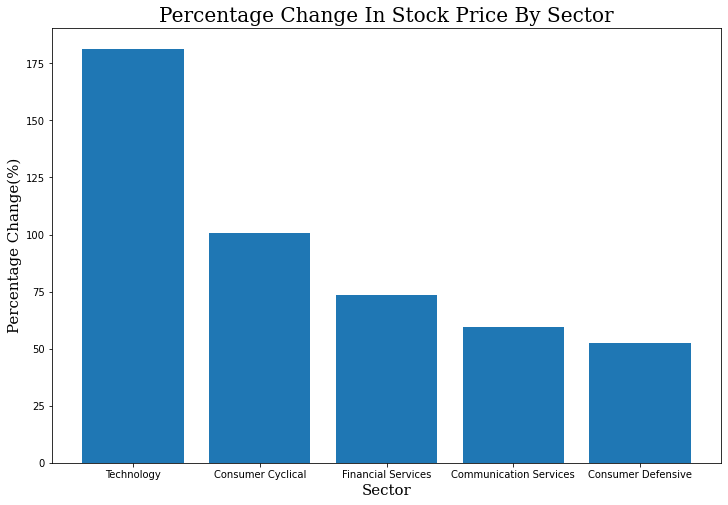

In [10]:
cur.execute( """
            with a as (
                select ROW_NUMBER() OVER (order by symbol) as row_, symbol, date, close 
                    from stock_history),

                b as (
                select symbol, min(row_) as min_row, max(row_) as max_row 
                    from a
                    where date> to_date('01012019', 'mmddyyyy')
                    group by symbol),

                c as (
                select a.symbol, a.close as oldest_close 
                    from a, b 
                    where a.symbol = b.symbol and a.row_ = b.min_row),

                d as (
                select a.symbol, a.close as latest_close 
                    from a, b 
                    where a.symbol = b.symbol and a.row_ = b.max_row),
                    
                e as (
                select *, ((latest_close-oldest_close)/oldest_close)*100 as pcpt_change 
                    from c natural join d natural join company
                    order by pcpt_change desc
                )
                
                select sector, sum(pcpt_change)/count(*) as pcpt_change_by_sector 
                    from e 
                    group by sector 
                    order by pcpt_change_by_sector desc

            
        """)

result_pcpt_sector = cur.fetchall()
df_pcpt_sector = pd.DataFrame(result_pcpt_sector, columns = [ 'Sector', 'Pcpt_Change_By_Sector'])

fig6 = plt.figure()
plt.bar(df_pcpt_sector['Sector'], df_pcpt_sector['Pcpt_Change_By_Sector'])
plt.gcf().set_size_inches(2 * plt.gcf().get_size_inches())

plt.title("Percentage Change In Stock Price By Sector" , fontdict = font1)
plt.xlabel("Sector", fontdict = font2)
plt.ylabel("Percentage Change(%)", fontdict = font2)

#df_pcpt_sector

## Dividend Payout by Companies

Text(0, 0.5, 'Dividend Amount(Million $)')

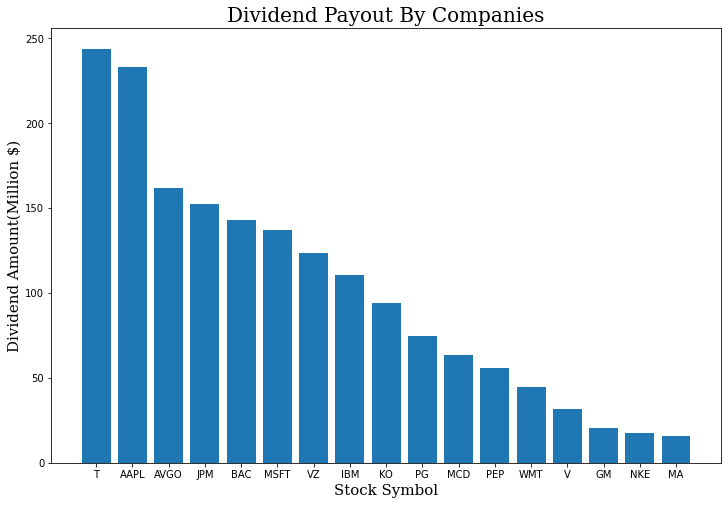

In [11]:
cur.execute( """
            select symbol, sum(dividend*volume)/1000000 as total_dividend
                from stock_history 
                where dividend is not null 
                and dividend != 0
                and date> to_date('01012019', 'mmddyyyy')
                group by symbol 
                order by total_dividend desc
        """)

result_dividend = cur.fetchall()
df_dividend = pd.DataFrame(result_dividend, columns = [ 'Symbol', 'Total_Dividend'])

fig7 = plt.figure()
plt.bar(df_dividend['Symbol'], df_dividend['Total_Dividend'])
plt.gcf().set_size_inches(2 * plt.gcf().get_size_inches())

plt.title("Dividend Payout By Companies" , fontdict = font1)
plt.xlabel("Stock Symbol", fontdict = font2)
plt.ylabel("Dividend Amount(Million $)", fontdict = font2)

#df_pcpt_sector

In [12]:
conn.close()